**Importing all Required Libraries**

In [0]:
import pylab
import calendar
import numpy as np
import pandas as pd
import seaborn as sn
from scipy import stats
import missingno as msno
from datetime import datetime
import matplotlib.pyplot as plt
import warnings
pd.options.mode.chained_assignment = None
warnings.filterwarnings("ignore", category=DeprecationWarning)
%matplotlib inline
from google.colab import files
import io

**Importing the data set and creating a dataframe object for the data**

In [0]:
url1 = "https://drive.google.com/uc?export=download&id=1_3NMAGeupfl_8BfSJ5ep-TD_NA0zqFCx"
url2 = "https://drive.google.com/uc?export=download&id=13Z1ohEvuZOMMP9pKxinjpEupzQIuZMgo" 

In [0]:
data = pd.read_csv(url1, header=0)
data_weather = data.copy()

**Perform Basic Analysis of the data**
**1. Look at the datatypes**
**2. Structure of the data**
**3. Values in the Data**

In [0]:
data.dtypes
data.head()
data.shape

(10886, 12)



Columns "season","holiday","workingday" and "weather" should be of "categorical" data type.But the current data type is "int" for those columns. This needs transformation part of EDA

    1. Create new columns "date,"hour","weekDay","month" from "datetime" column.
    2. Coerce the datatype of "season","holiday","workingday" and weather to category type.
    3. Drop the datetime column after completion of step 2



In [0]:
data["date"] = data.datetime.apply(lambda x : x.split()[0])
data["hour"] = data.datetime.apply(lambda x : x.split()[1].split(":")[0])
data["weekday"] = data.date.apply(lambda dateString : calendar.day_name[datetime.strptime(dateString,"%m/%d/%Y").weekday()])
data["month"] = data.date.apply(lambda dateString : calendar.month_name[datetime.strptime(dateString,"%m/%d/%Y").month])

**Recoding to the actual meaning of the season and weather feature**

In [0]:
data["season"] = data.season.map({1: "Spring", 2 : "Summer", 3 : "Fall", 4 :"Winter" })
data["weather"] = data.weather.map({1: " Clear + Few clouds + Partly cloudy + Partly cloudy",\
                                        2 : " Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist ", \
                                        3 : " Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds", \
                                        4 :" Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog " })

In [0]:
cat1 = ["hour","weekday","month","season","weather","holiday","workingday"]
for x in cat1:
    data[x] = data[x].astype("category")

In [0]:

data =data.drop(["datetime"],axis=1)



**Checking for Missing Values**

In [0]:
data.isnull().sum()

In [0]:
fig, axes = plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(12, 10)
sn.boxplot(data=data,y="count",orient="v",ax=axes[0][0])
sn.boxplot(data=data,y="count",x="season",orient="v",ax=axes[0][1])
sn.boxplot(data=data,y="count",x="hour",orient="v",ax=axes[1][0])
sn.boxplot(data=data,y="count",x="workingday",orient="v",ax=axes[1][1])

axes[0][0].set(ylabel='Count',title="Box Plot On Count")
axes[0][1].set(xlabel='Season', ylabel='Count',title="Box Plot On Count Across Season")
axes[1][0].set(xlabel='Hour Of The Day', ylabel='Count',title="Box Plot On Count Across Hour Of The Day")
axes[1][1].set(xlabel='Working Day', ylabel='Count',title="Box Plot On Count Across Working Day")

**Outlier Analysis **

1. "count" variable contains lot of outlier data points which skews the distribution towards right (as there are more data points beyond Outer Quartile Limit.

2. Spring season has got relatively lower count.The dip in median value in boxplot gives evidence for it.

3. The median value for the boxplot with "Hour Of The Day" are higher at 7AM - 8AM and 5PM - 6PM.  This could be because of the peak overs for school and office goers.

4.Most of the outlier points are mainly contributed from "Working Day" than "Non Working Day".

**Correlation Analysis**

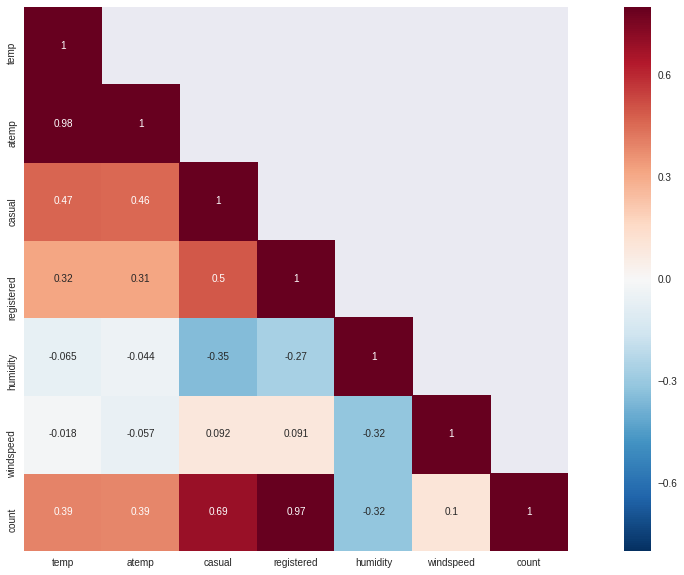

In [0]:
corr = data[["temp","atemp","casual","registered","humidity","windspeed","count"]].corr()
mask = np.array(corr)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sn.heatmap(corr, mask=mask,vmax=.8, square=True,annot=True)

One common to understand how a dependent variable is influenced by features (numerical) is to fibd a correlation matrix between them. Lets plot a correlation plot between "count" and ["temp","atemp","humidity","windspeed"].

1.temp and humidity features has got positive and negative correlation with count respectively.Although the correlation between them are not very prominent still the count variable has got little dependency on "temp" and "humidity".
2.windspeed is not gonna be really useful numerical feature and it is visible from it correlation value with "count"
"atemp" is variable is not taken into since "atemp" and "temp" has got strong correlation with each other. During model building any one of the variable has to be dropped since they will exhibit multicollinearity in the data.
3."Casual" and "Registered" are also not taken into account since they could be leakage variables by nature and need to dropped during model building.

In [0]:
import matplotlib.pyplot as plt
fig,(ax1,ax2,ax3) = plt.subplots(ncols=4)
fig.set_size_inches(12, 5)
sn.regplot(x="temp", y="count", data=data,ax=ax1)
sn.regplot(x="windspeed", y="count", data = data,ax=ax2)
sn.regplot(x="humidity", y="count", data = data, ax=ax3)

Variation of count variables with temp,windspeed and humidity. From the plot we can see that 

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


((array([-3.83154229, -3.60754977, -3.48462983, ...,  3.48462983,
          3.60754977,  3.83154229]),
  array([  1,   1,   1, ..., 968, 970, 977])),
 (169.82942673231386, 191.5741319125482, 0.9372682766213176))

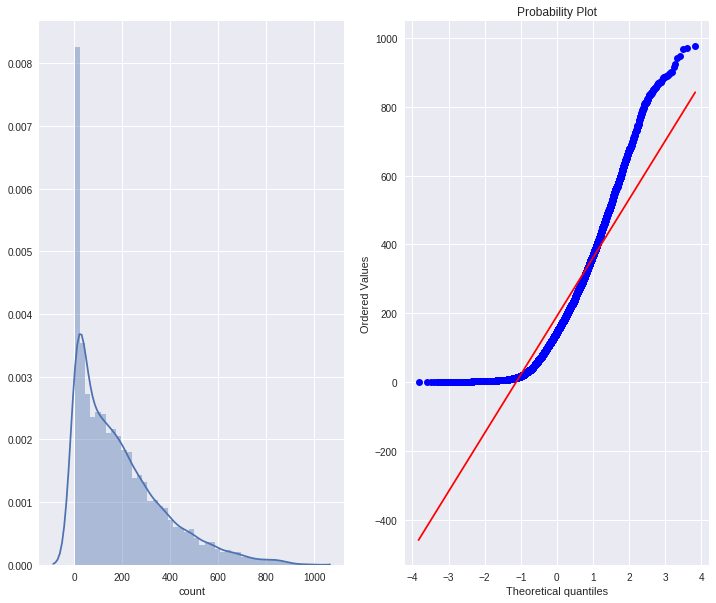

In [0]:
fig,axes = plt.subplots(ncols=2,nrows=1)
fig.set_size_inches(12, 10)
sn.distplot(data["count"],ax=axes[0])
stats.probplot(data["count"], dist='norm', fit=True, plot=axes[1])

In [0]:
data.head()
data["hour"] = pd.to_numeric(data["hour"])
data.dtypes

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


[Text(0, 0.5, 'Users Count'),
 Text(0.5, 0, 'Hour Of The Day'),
 Text(0.5, 1.0, 'Average Users Count By Hour Of The Day Across User Type'),
 None]

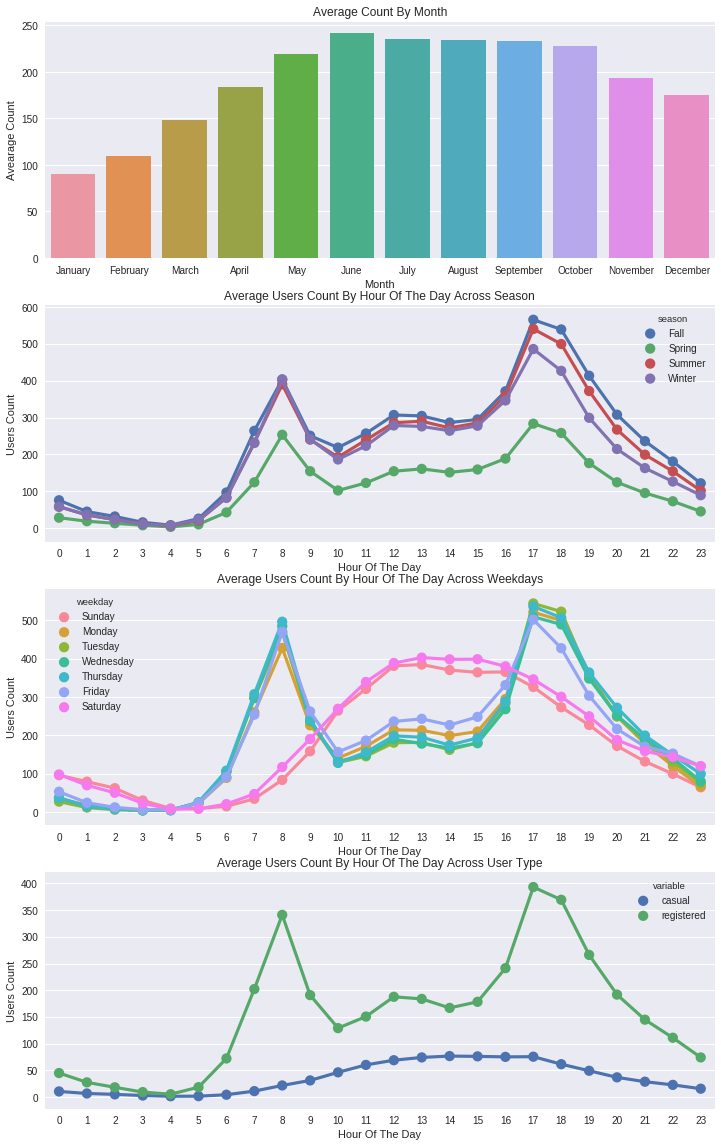

In [0]:
fig,(ax1,ax2,ax3,ax4)= plt.subplots(nrows=4)
fig.set_size_inches(12,20)
sortOrder = ["January","February","March","April","May","June","July","August","September","October","November","December"]
hueOrder = ["Sunday","Monday","Tuesday","Wednesday","Thursday","Friday","Saturday"]

monthAggregated = pd.DataFrame(data.groupby("month")["count"].mean()).reset_index()
monthSorted = monthAggregated.sort_values(by="count",ascending=False)
sn.barplot(data=monthSorted,x="month",y="count",ax=ax1,order=sortOrder)
ax1.set(xlabel='Month', ylabel='Avearage Count',title="Average Count By Month")

hourAggregated = pd.DataFrame(data.groupby(["hour","season"],sort=True)["count"].mean()).reset_index()
sn.pointplot(x=hourAggregated["hour"], y=hourAggregated["count"],hue=hourAggregated["season"], data=hourAggregated, join=True,ax=ax2)
ax2.set(xlabel='Hour Of The Day', ylabel='Users Count',title="Average Users Count By Hour Of The Day Across Season",label='big')

hourAggregated = pd.DataFrame(data.groupby(["hour","weekday"],sort=True)["count"].mean()).reset_index()
sn.pointplot(x=hourAggregated["hour"], y=hourAggregated["count"],hue=hourAggregated["weekday"],hue_order=hueOrder, data=hourAggregated, join=True,ax=ax3)
ax3.set(xlabel='Hour Of The Day', ylabel='Users Count',title="Average Users Count By Hour Of The Day Across Weekdays",label='big')

hourTransformed = pd.melt(data[["hour","casual","registered"]], id_vars=['hour'], value_vars=['casual', 'registered'])
hourAggregated = pd.DataFrame(hourTransformed.groupby(["hour","variable"],sort=True)["value"].mean()).reset_index()
sn.pointplot(x=hourAggregated["hour"], y=hourAggregated["value"],hue=hourAggregated["variable"],hue_order=["casual","registered"], data=hourAggregated, join=True,ax=ax4)
ax4.set(xlabel='Hour Of The Day', ylabel='Users Count',title="Average Users Count By Hour Of The Day Across User Type",label='big')

It is quiet obvious that people tend to rent bike during summer season since it is really conducive to ride bike at that season.Therefore June, July and August has got relatively higher demand for bicycle.
On weekdays more people tend to rent bicycle around 7AM-8AM and 5PM-6PM. As we mentioned earlier this can be attributed to regular school and office commuters.
Above pattern is not observed on "Saturday" and "Sunday".More people tend to rent bicycle between 10AM and 4PM.
The peak user count around 7AM-8AM and 5PM-6PM is purely contributed by registered user

In [0]:

datatrain = pd.read_csv(url1, header=0)
datatest = pd.read_csv(url2, header=0)

In [0]:
data_final = datatrain.append(datatest)
data_final.reset_index(inplace=True)
data_final.drop('index',inplace=True,axis=1)

In [0]:
data_final

In [0]:
data_final["date"] = data_final.datetime.apply(lambda x : x.split()[0])
data_final["hour"] = data_final.datetime.apply(lambda x : x.split()[1].split(":")[0]).astype("int")
data_final["year"] = data_final.datetime.apply(lambda x : x.split()[0].split("-")[0])
data_final["weekday"] = data_final.date.apply(lambda dateString : datetime.strptime(dateString,"%m/%d/%Y").weekday())
data_final["month"] = data_final.date.apply(lambda dateString : datetime.strptime(dateString,"%m/%d/%Y").month)

In [0]:
data_final.dtypes

atemp         float64
casual        float64
count         float64
datetime       object
holiday         int64
humidity        int64
registered    float64
season          int64
temp          float64
weather         int64
windspeed     float64
workingday      int64
date           object
hour            int64
year           object
weekday         int64
month           int64
dtype: object

In [0]:
catFeatureNames = ["season","holiday","workingday","weather","weekday","month","year","hour"]
numFeatureNames = ["temp","humidity","windspeed","atemp"]
dropFeatures = ['casual',"count","datetime","date","registered","year"]

In [0]:
for var in catFeatureNames:
    data_final[var] = data_final[var].astype("category")

In [0]:
datatrain = data_final[pd.notnull(data_final['count'])].sort_values(by=["datetime"])
datatest = data_final[~pd.notnull(data_final['count'])].sort_values(by=["datetime"])
#datetimecol = data_final["datetime"]
yLabels = datatrain["count"]
yLablesRegistered = datatrain["registered"]
yLablesCasual = datatrain["casual"]

In [0]:
datatrain  = datatrain.drop(dropFeatures,axis=1)
datatest  = datatest.drop(dropFeatures,axis=1)

In [0]:
datatrain

In [0]:
def rmsle(y, y1,convertExp=True):
    if convertExp:
        y = np.exp(y),
        y1 = np.exp(y1)
    log1 = np.nan_to_num(np.array([np.log(x + 1) for x in y]))
    log2 = np.nan_to_num(np.array([np.log(x + 1) for x in y1]))
    calc = (log1 - log2) ** 2
    return np.sqrt(np.mean(calc))

In [0]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
lm = LinearRegression()
yLabelsLog = np.log1p(yLabels)
lm.fit(X = datatrain,y = yLabelsLog)
preds_lm = lm.predict(datatrain)
rmsle_preds_lm = rmsle(np.exp(yLabelsLog),np.exp(preds_lm),False)
preds_Test_lm = lm.predict(X= datatest)

In [0]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100)
yLabelsLog = np.log1p(yLabels)
rf.fit(datatrain,yLabelsLog)
preds_rf = rf.predict(datatrain)
rmsle_preds_rf = rmsle(np.exp(yLabelsLog),np.exp(preds_rf),False)
preds_Test_rf = rf.predict(X= datatest)

In [0]:
from sklearn.ensemble import GradientBoostingRegressor
gbm = GradientBoostingRegressor(n_estimators=4000,alpha=0.01);
yLabelsLog = np.log1p(yLabels)
gbm.fit(datatrain,yLabelsLog)
preds_gbm = gbm.predict(datatrain)
rmsle_preds_gbm = rmsle(np.exp(yLabelsLog),np.exp(preds_gbm),False)
preds_Test_gbm = gbm.predict(X= datatest)

In [0]:
dataf = {
        'RMSLE': [rmsle_preds_lm, rmsle_preds_rf,rmsle_preds_gbm],
        'Model':['Linear Regression','RandomForest','GBM'],}
final_results = pd.DataFrame(data=dataf)
final_results

,Model,RMSLE
0,Linear Regression,0.999777
1,RandomForest,0.131813
2,GBM,0.246692


/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


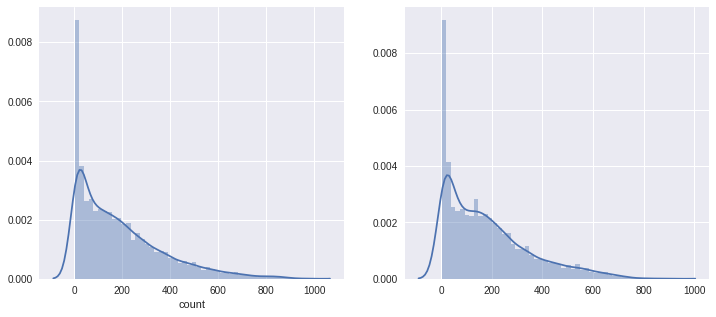

In [0]:
fig,(ax1,ax2)= plt.subplots(ncols=2)
fig.set_size_inches(12,5)
sn.distplot(yLabels,ax=ax1,bins=50)
sn.distplot(np.exp(preds_Test_gbm),ax=ax2,bins=50)

Splitting training and testing

In [0]:
datatrain1= data_final[pd.notnull(data_final['count'])].sort_values(by=["datetime"])
dropFeatures1 = ['casual',"datetime","date","registered","year"]
datatrain1 =datatrain1.drop(dropFeatures1 , axis = 1)


In [0]:
X1 = datatrain1.drop('count', axis =1)
y1 = datatrain1.iloc[:,1].values


In [0]:
from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size = 0.20,random_state = 0)

In [0]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [0]:
lm.fit(X_train1, y_train1)
y_pred_regr= lm.predict(X_test1)
MAPE_reg = mean_absolute_percentage_error(y_pred_regr, y_test1)
MAE_reg = metrics.mean_absolute_error(y_pred_regr, y_test1)
##RF
rf.fit(X_train1, y_train1)
y_pred_rf= rf.predict(X_test1)
MAPE_rf = mean_absolute_percentage_error(y_pred_rf, y_test1)
MAE_rf = metrics.mean_absolute_error(y_pred_rf, y_test1)
##GBM
gbm.fit(X_train1, y_train1)
y_pred_gbm= gbm.predict(X_test1)
MAPE_gbm = mean_absolute_percentage_error(y_pred_gbm, y_test1)
MAE_gbm = metrics.mean_absolute_error(y_pred_gbm, y_test1)

In [0]:
dataf = {
        'MAE': [MAE_reg, MAE_rf,MAE_gbm],
        'MAPE': [MAPE_reg,MAPE_rf,MAPE_gbm],
        'Model':['Linear Regression','RandomForest','GBM'],}
final_metrics = pd.DataFrame(data=dataf)
final_metrics

,MAE,MAPE,Model
0,111.157476,1017.097878,Linear Regression
1,43.138524,28.069314,RandomForest
2,44.774627,120.117816,GBM
